In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("BGLdata.csv")

In [3]:
df.head()

,ID,Age_Band,Segment,Mosaic_Group,NCD,Vehicle_Value,Vehicle_Manufacturer,BrandA_Price,BrandA_Rank,BrandA_Selected,BrandB_Price,BrandB_Rank,BrandB_Selected,BrandC_Price,BrandC_Rank,BrandC_Selected
0,1,25-34,A,Aspiring Homemakers,2 Years,3000-4999,Ford,1219.31,47,0,1111.53,32,0,1356.79,53,0
1,2,45-54,B,Domestic Success,9 Years,10000-14999,Mini,213.65,24,0,205.95,15,0,321.44,65,0
2,3,45-54,B,Domestic Success,9 Years,10000-14999,Mini,224.40,24,0,216.70,18,0,340.61,66,0
3,4,45-54,B,Domestic Success,9 Years,10000-14999,Mini,222.88,19,0,222.06,16,0,370.04,69,0
4,5,25-34,A,Aspiring Homemakers,2 Years,3000-4999,Ford,1249.71,47,0,1140.33,31,0,1430.99,54,0


In [100]:
df.info()
#Looking at the information about data, we notice that Mosaic_Group is not populated for all customers.
#The missing number is not significant but has to be filled for further analysis.
df['Mosaic_Group'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
ID                      150000 non-null int64
Age_Band                150000 non-null object
Segment                 150000 non-null object
Mosaic_Group            148381 non-null object
NCD                     150000 non-null object
Vehicle_Value           150000 non-null object
Vehicle_Manufacturer    150000 non-null object
BrandA_Price            150000 non-null float64
BrandA_Rank             150000 non-null int64
BrandA_Selected         150000 non-null int64
BrandB_Price            150000 non-null float64
BrandB_Rank             150000 non-null int64
BrandB_Selected         150000 non-null int64
BrandC_Price            150000 non-null float64
BrandC_Rank             150000 non-null int64
BrandC_Selected         150000 non-null int64
AnyBrand_Selected       150000 non-null object
dtypes: float64(3), int64(7), object(7)
memory usage: 19.5+ MB


count                  148381
unique                     15
top       Aspiring Homemakers
freq                    23330
Name: Mosaic_Group, dtype: object

In [107]:
#From the above we see that the most popular group is aspiring homemakers.
#We fill the blanks with this as a rough estimation
df['Mosaic_Group'].fillna('Aspiring Homemakers', inplace=True)

In [108]:
df['Mosaic_Group'].describe()

count                  150000
unique                     15
top       Aspiring Homemakers
freq                    24949
Name: Mosaic_Group, dtype: object

In [5]:
#We add a new column to aggregate the customers who selected any of the brands
condition = (df['BrandA_Selected']  == 1) | (df['BrandB_Selected'] == 1) | (df['BrandC_Selected'] == 1)
df['AnyBrand_Selected'] = np.where(condition, '1', '0')

In [6]:
#Calculate the percentage selection
selected_any = df["AnyBrand_Selected"].value_counts()

In [7]:
selected_any_perc = 100*(selected_any[1]/(selected_any[0]+selected_any[1]))

In [8]:
print ("From all customers who searched for a quote, {}% selected brand A, B or C.".format(round(selected_any_perc,2)))

From all customers who searched for a quote, 33.33% selected brand A, B or C.


In [9]:
#To identify percentage selected for each brand
def selected(brand):
    return df["Brand{}_Selected".format(brand)].value_counts()
def selected_perc(brand):
    return 100 * (selected(brand)[1]/(selected(brand)[0]+selected(brand)[1]))

In [10]:
#A/B/C split
brands = ["A","B","C"]
for brand in brands:
    print (selected(brand))
    print ("From all customers who searched for a quote, {}% ".format(round(selected_perc(brand),2)))
    print ("selected brand {}".format(brand))

0    145996
1      4004
Name: BrandA_Selected, dtype: int64
From all customers who searched for a quote, 2.67% 
selected brand A
0    123552
1     26448
Name: BrandB_Selected, dtype: int64
From all customers who searched for a quote, 17.63% 
selected brand B
0    130452
1     19548
Name: BrandC_Selected, dtype: int64
From all customers who searched for a quote, 13.03% 
selected brand C


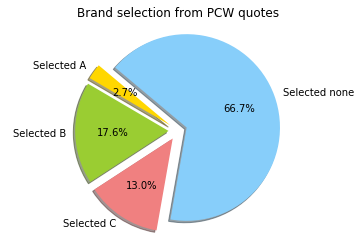

In [11]:
# Graphically
plt.title('Brand selection from PCW quotes')
labels = 'Selected A', 'Selected B', 'Selected C', 'Selected none'
selected_all = (selected_perc('A')+selected_perc('B')+selected_perc('C'))
sizes = [selected_perc('A'), selected_perc('B'), selected_perc('C'), (100 - (selected_all))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

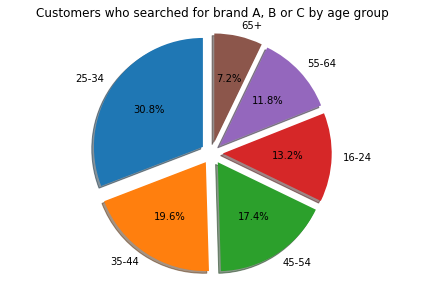

In [117]:
#Age of customers who searched
searched_age = df['Age_Band'].value_counts().to_frame()
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)
# Pie chart  
fig1, ax1 = plt.subplots()
ax1.pie(searched_age, explode = explode, labels=searched_age.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Customers who searched for brand A, B or C by age group')
plt.show()

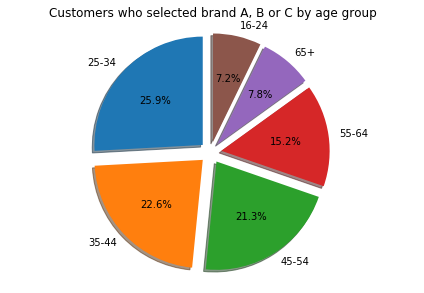

In [118]:
#Age of customers who selected
selected_age = df_selected['Age_Band'].value_counts().to_frame()
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)
# Pie chart 
fig1, ax1 = plt.subplots()
ax1.pie(selected_age, explode = explode, labels=selected_age.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Customers who selected brand A, B or C by age group')
plt.show()

In [12]:
#Price elasticity of demand (PED or Ed) is a measure used in economics to show the responsiveness, or elasticity,
#of the quantity demanded of a good or service to a change in its price when nothing but the price changes.
#Here we check the correlations of prices on selection. 
# notice that the impact of the price on demand across the brands is highest for brand B. 
brands = ["A","B","C"]
for brand in brands:
    print (df[['Brand{}_Price'.format(brand),'Brand{}_Selected'.format(brand)]].corr())

                 BrandA_Price  BrandA_Selected
BrandA_Price          1.00000         -0.12334
BrandA_Selected      -0.12334          1.00000
                 BrandB_Price  BrandB_Selected
BrandB_Price         1.000000        -0.293719
BrandB_Selected     -0.293719         1.000000
                 BrandC_Price  BrandC_Selected
BrandC_Price         1.000000        -0.152503
BrandC_Selected     -0.152503         1.000000


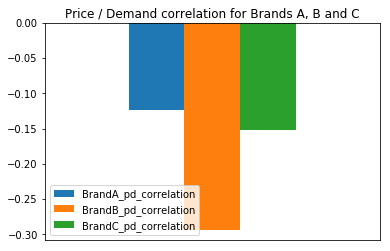

In [129]:
#Graphically
elasticity_data = {'BrandA_pd_correlation':[-0.12334],'BrandB_pd_correlation':[-0.293719],'BrandC_pd_correlation':[-0.152503]}
elasticity = pd.DataFrame(elasticity_data)
elasticity.plot(kind='bar')
plt.title('Price / Demand correlation for Brands A, B and C')
plt.xticks([])
plt.show()

Text(0.5,1,'Correlations between columns in data')

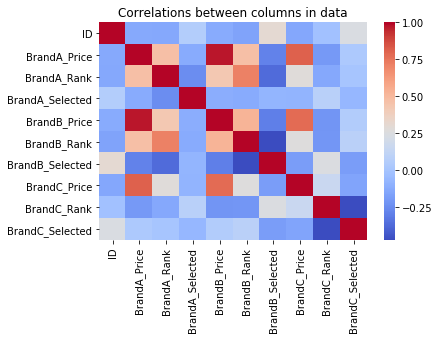

In [335]:
# Explore various correlations.
# Notice that the negative correlations between brands ranking and selection can be noticed
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlations between columns in data')

In [15]:
#To see the current prices info
for brand in brands:
    print ("Brand {} stats:".format(brand))
    print(df['Brand{}_Price'.format(brand)].describe())
    print('')

Brand A stats:
count    150000.000000
mean        752.155899
std         646.658259
min          93.370000
25%         329.580000
50%         532.800000
75%         941.720000
max        4999.310000
Name: BrandA_Price, dtype: float64

Brand B stats:
count    150000.000000
mean        703.285704
std         619.382110
min          92.170000
25%         308.740000
50%         491.035000
75%         868.472500
max        4986.890000
Name: BrandB_Price, dtype: float64

Brand C stats:
count    150000.000000
mean        666.014728
std         513.574146
min         240.920000
25%         325.507500
50%         488.710000
75%         797.512500
max        4920.450000
Name: BrandC_Price, dtype: float64



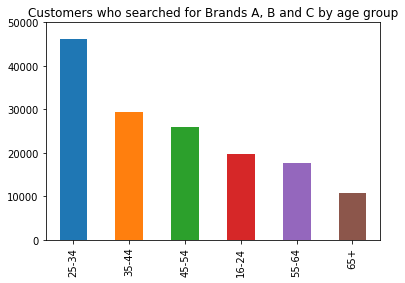

In [120]:
#Who searched for brands
age = df['Age_Band'].value_counts()
plt.ylim(0, 50000)
plt.title('Customers who searched for Brands A, B and C by age group')
age.plot(kind='bar')

In [36]:
age_selected = df_selected['Age_Band'].value_counts()

25-34    12932
35-44    11282
45-54    10636
55-64     7624
65+       3924
16-24     3602
Name: Age_Band, dtype: int64


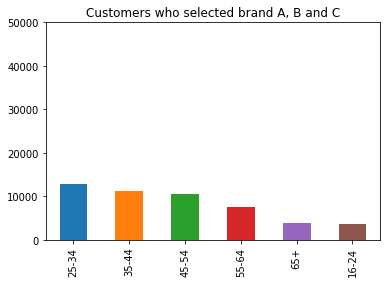

In [119]:
print (age_selected)
plt.title('Customers who selected brand A, B and C')
plt.ylim(0, 50000) 
age_selected.plot(kind='bar')


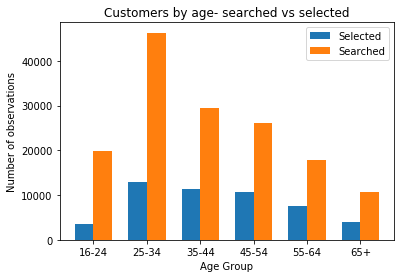

In [128]:
index = np.arange(6)
bar_width = 0.35

fig, ax = plt.subplots()
summer = ax.bar(index, df_selected['Age_Band'].value_counts().sort_index(), bar_width,
                label="Selected")

winter = ax.bar(index+bar_width, df["Age_Band"].value_counts().sort_index(),
                 bar_width, label="Searched")

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of observations')
ax.set_title('Customers by age- searched vs selected')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["16-24","25-34", "35-44", "45-54", "55-64", "65+"])
ax.legend()

plt.show()

In [130]:
#Seperate customers who did not buy anything
df_unselected = df[df["AnyBrand_Selected"]=='0']

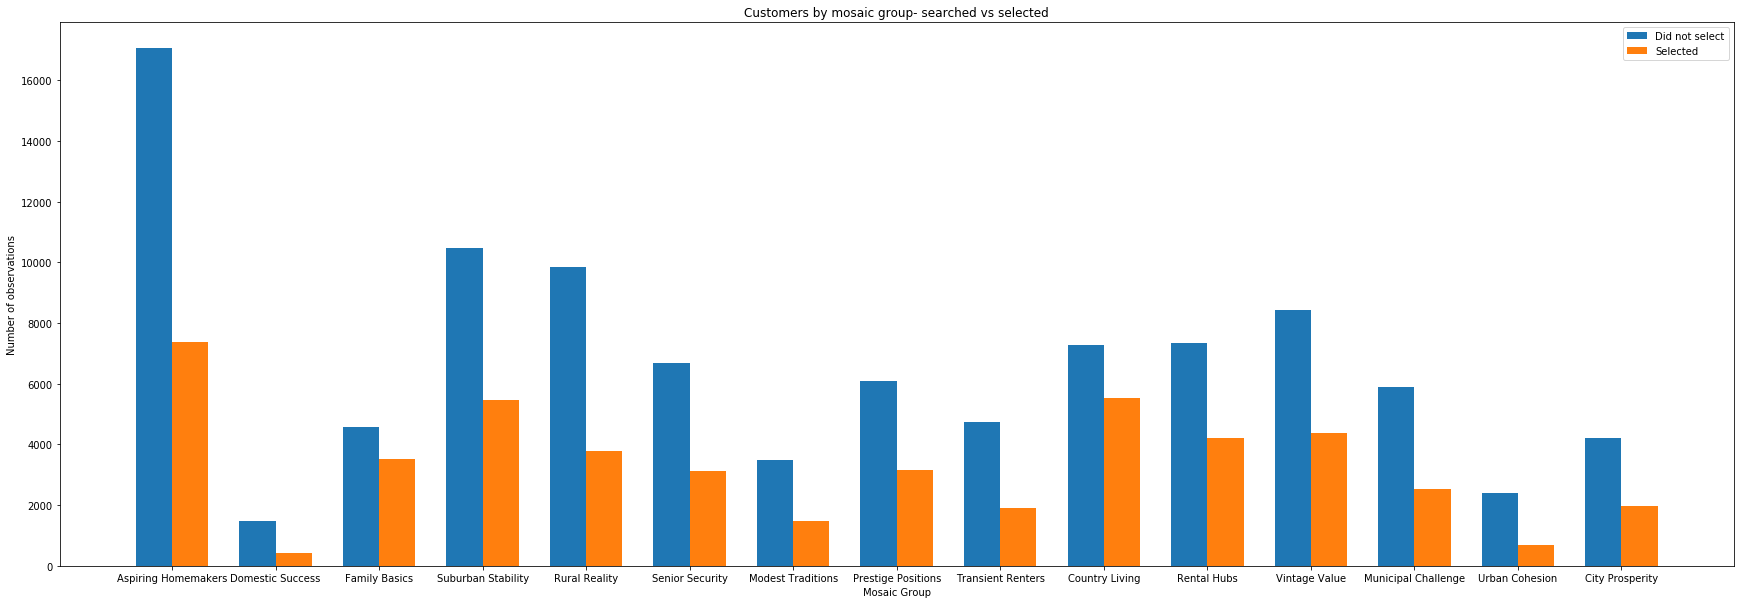

In [170]:
index = np.arange(15)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(30, 10))
summer = ax.bar(index, df_unselected["Mosaic_Group"].value_counts().sort_index(), bar_width,
                label="Did not select")

winter = ax.bar(index+bar_width, df_selected["Mosaic_Group"].value_counts().sort_index(),
                 bar_width, label="Selected")

ax.set_xlabel('Mosaic Group')
ax.set_ylabel('Number of observations')
ax.set_title('Customers by mosaic group- searched vs selected')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df["Mosaic_Group"].value_counts().index)
ax.legend()

plt.show()

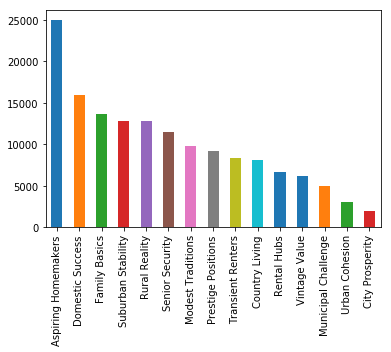

In [267]:
mosaic = df["Mosaic_Group"].value_counts().sort_index()
mosaic_sorted = mosaic.sort_values(ascending=False).plot(kind="bar")

In [177]:
selected_mosaic = df_selected["Mosaic_Group"].value_counts().sort_index()

In [209]:
mosaic_rate = 100*selected_mosaic/mosaic

Selecion rate across mosaic groups


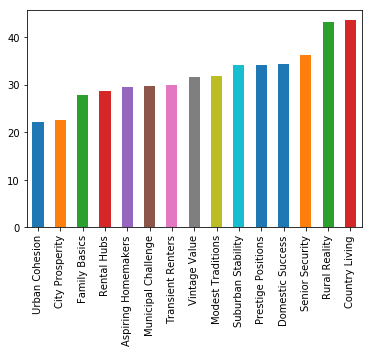

In [281]:
print("Selecion rate across mosaic groups")
x = mosaic_rate.sort_values(ascending=True)

x.plot(kind="bar")

In [317]:
#Define a function to see top 3 from column
def topthreeperc(data,column):
    print ("Top 3 characteristics for customers in column {}:".format(column))
    summary = data[column].value_counts()
    print (summary[:3])
    print("Percentage of top 3 values:")
    for i in summary[:3]:
        print (100*i/summary.sum(),'%')

topthreeperc(df_unselected,"Mosaic_Group")

Top 3 characteristics for customers in column Mosaic_Group:
Aspiring Homemakers    17058
Domestic Success       10484
Family Basics           9856
Name: Mosaic_Group, dtype: int64
Percentage of top 3 values:
17.058 %
10.484 %
9.856 %


In [311]:
topthreeperc(df_unselected,"Age_Band")

Top 3 characteristics for reluctant customers in column Age_Band:
25-34    33327
35-44    18149
16-24    16182
Name: Age_Band, dtype: int64
Percentage of top 3 values:
33.327 %
18.149 %
16.182 %


In [314]:
topthreeperc(df_unselected,"Vehicle_Manufacturer")

Top 3 characteristics for reluctant customers in column Vehicle_Manufacturer:
Ford          14980
Vauxhall      13255
Volkswagen     8764
Name: Vehicle_Manufacturer, dtype: int64
Percentage of top 3 values:
14.98 %
13.255 %
8.764 %


In [315]:
topthreeperc(df_unselected,"Vehicle_Value")

Top 3 characteristics for reluctant customers in column Vehicle_Value:
5000-7499      17630
3000-4999      16369
10000-14999    13781
Name: Vehicle_Value, dtype: int64
Percentage of top 3 values:
17.63 %
16.369 %
13.781 %
